In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from datetime import datetime

In [2]:
df= pd.read_csv('final_ds.csv')

In [3]:
df.head()

,TimeOMS,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season
0,2017-12-08 16:00:52,2.0,1.0,24.5,26.0,15.1,1.0,-1.5,0.0,9.4,62.895,16.0,12.0,2017.0,4.0,4
1,2017-12-08 16:10:52,2.0,1.0,24.5,26.0,15.6,1.0,-1.5,0.0,8.9,62.895,16.0,12.0,2017.0,4.0,4
2,2017-12-11 10:40:52,2.0,1.0,20.0,25.0,14.6,1.0,-5.0,0.0,5.4,55.420,10.0,12.0,2017.0,0.0,4
3,2017-12-11 10:50:52,2.0,1.0,20.5,25.0,14.6,1.0,-4.5,0.0,5.9,56.460,10.0,12.0,2017.0,0.0,4
4,2017-12-11 11:00:52,2.0,1.0,21.0,25.0,14.6,1.0,-4.0,0.0,6.4,56.460,11.0,12.0,2017.0,0.0,4


In [4]:
df.dropna(axis=0, inplace=True)
def dt(dtstring): 
    x=datetime.strptime(dtstring, '%Y-%m-%d %H:%M:%S')
    return x
df.dtypes
df['TimeOMS']=df['TimeOMS'].apply(lambda x: dt(x))
df['TS']= df['TimeOMS'].apply(lambda x: x.timestamp())

In [5]:
df.dtypes

TimeOMS         datetime64[ns]
ValueOMS               float64
ValueOOS               float64
ValueRT                float64
ValueST                float64
ValueOAT               float64
AnomalousST            float64
STDeviation            float64
AnomalousOAT           float64
OATDeviation           float64
ValueOAH               float64
HourofDay              float64
Month                  float64
Year                   float64
DayofWeek              float64
Season                   int64
TS                     float64
dtype: object

In [6]:
df_st= df[df['AnomalousST']==1]

<AxesSubplot:ylabel='Density'>

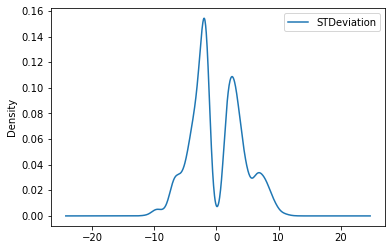

In [7]:
df_st.plot(x='HourofDay', y='STDeviation', kind='kde')

# Unsupervised: K means clustering 

In [8]:
df1= df.drop(['AnomalousST','AnomalousOAT','ValueOOS', 'Year','Season'], axis=1)
df1.head()

,TimeOMS,ValueOMS,ValueRT,ValueST,ValueOAT,STDeviation,OATDeviation,ValueOAH,HourofDay,Month,DayofWeek,TS
0,2017-12-08 16:00:52,2.0,24.5,26.0,15.1,-1.5,9.4,62.895,16.0,12.0,4.0,1.512749e+09
1,2017-12-08 16:10:52,2.0,24.5,26.0,15.6,-1.5,8.9,62.895,16.0,12.0,4.0,1.512749e+09
2,2017-12-11 10:40:52,2.0,20.0,25.0,14.6,-5.0,5.4,55.420,10.0,12.0,0.0,1.512989e+09
3,2017-12-11 10:50:52,2.0,20.5,25.0,14.6,-4.5,5.9,56.460,10.0,12.0,0.0,1.512989e+09
4,2017-12-11 11:00:52,2.0,21.0,25.0,14.6,-4.0,6.4,56.460,11.0,12.0,0.0,1.512990e+09


In [9]:
df1.columns

Index(['TimeOMS', 'ValueOMS', 'ValueRT', 'ValueST', 'ValueOAT', 'STDeviation',
       'OATDeviation', 'ValueOAH', 'HourofDay', 'Month', 'DayofWeek', 'TS'],
      dtype='object')

In [10]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 

In [11]:
scaler = StandardScaler()
# define dataset
X=(df1.drop(labels=['TimeOMS'], axis=1))
scaler=scaler.fit(X)
X1=scaler.transform(X)


In [12]:
wcss=[]
silh_score=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i, algorithm='full',random_state=42)
    kmeans.fit(X1)
    predictions=kmeans.predict(X1)
    wcss.append(kmeans.inertia_)
    silh_score.append(metrics.silhouette_score(X1,predictions))
wcss


[106118.40606941389,
 89971.51846317457,
 80975.15881239291,
 72603.5050923863,
 67741.14324388868,
 63197.70360779054,
 60370.16272542952,
 57044.91791396483]

Text(0, 0.5, 'Within cluster point scatter')

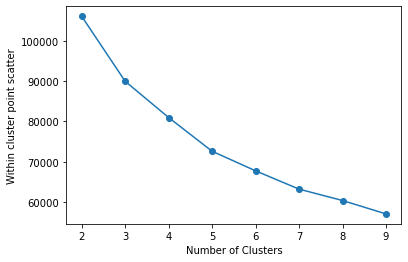

In [13]:
plt.plot(range(2,10), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within cluster point scatter')

In [14]:
silh_score

[0.3841197319302451,
 0.34289653775067547,
 0.2631851204870436,
 0.24526678293630771,
 0.24768310752930153,
 0.2428240207293537,
 0.22642412401923323,
 0.21252521840037814]

### 3 Clusters

In [15]:
#define the model 
model = KMeans(n_clusters=3, algorithm='full',random_state=42)
# fit the model
model.fit(X1)

model.inertia_
# assign a cluster to each example
fitted_kmeans = model.predict(X1)
print(fitted_kmeans)
print(metrics.silhouette_score(X1,fitted_kmeans))
# retrieve unique clusters
clusters = unique(fitted_kmeans)
print(clusters)
# create scatter plot for samples from each cluster


[0 0 0 ... 2 2 2]
0.34289653775067547
[0 1 2]


In [16]:
from sklearn.metrics import davies_bouldin_score

In [17]:
print('calinski harabasz score')
print(metrics.calinski_harabasz_score(X1,fitted_kmeans))
print('davies bouldin')
print(davies_bouldin_score(X1,fitted_kmeans))

calinski harabasz score
9092.61404318974
davies bouldin
1.437314112751509


In [18]:
#print(fitted_kmeans.unique())
unique, counts = np.unique(fitted_kmeans, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 3111]
 [   1 7472]
 [   2 6371]]


In [19]:
X1.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [20]:
df_analysed=df
df_analysed['3c']=fitted_kmeans


In [21]:
df_analysed.head()

,TimeOMS,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS,3c
0,2017-12-08 16:00:52,2.0,1.0,24.5,26.0,15.1,1.0,-1.5,0.0,9.4,62.895,16.0,12.0,2017.0,4.0,4,1.512749e+09,0
1,2017-12-08 16:10:52,2.0,1.0,24.5,26.0,15.6,1.0,-1.5,0.0,8.9,62.895,16.0,12.0,2017.0,4.0,4,1.512749e+09,0
2,2017-12-11 10:40:52,2.0,1.0,20.0,25.0,14.6,1.0,-5.0,0.0,5.4,55.420,10.0,12.0,2017.0,0.0,4,1.512989e+09,0
3,2017-12-11 10:50:52,2.0,1.0,20.5,25.0,14.6,1.0,-4.5,0.0,5.9,56.460,10.0,12.0,2017.0,0.0,4,1.512989e+09,0
4,2017-12-11 11:00:52,2.0,1.0,21.0,25.0,14.6,1.0,-4.0,0.0,6.4,56.460,11.0,12.0,2017.0,0.0,4,1.512990e+09,0


In [22]:
noise_3c=df_analysed[df_analysed['3c']==0]
#noise_3c.to_csv('kmeansnoise3.csv')
normal_3c=df_analysed[df_analysed['3c']!=0]
#normal_3c.to_csv('kmeansnormal3.csv')

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
y=model.fit(X1).labels_
#y=label_binarize(y, classes=[0,1,2])
rfc=RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [ ]:
y

In [24]:
X_shap=(df_analysed[df_analysed['3c']==0]).drop('3c', axis=1)

In [25]:
X_shap.head()

,TimeOMS,ValueOMS,ValueOOS,ValueRT,ValueST,ValueOAT,AnomalousST,STDeviation,AnomalousOAT,OATDeviation,ValueOAH,HourofDay,Month,Year,DayofWeek,Season,TS
0,2017-12-08 16:00:52,2.0,1.0,24.5,26.0,15.1,1.0,-1.5,0.0,9.4,62.895,16.0,12.0,2017.0,4.0,4,1.512749e+09
1,2017-12-08 16:10:52,2.0,1.0,24.5,26.0,15.6,1.0,-1.5,0.0,8.9,62.895,16.0,12.0,2017.0,4.0,4,1.512749e+09
2,2017-12-11 10:40:52,2.0,1.0,20.0,25.0,14.6,1.0,-5.0,0.0,5.4,55.420,10.0,12.0,2017.0,0.0,4,1.512989e+09
3,2017-12-11 10:50:52,2.0,1.0,20.5,25.0,14.6,1.0,-4.5,0.0,5.9,56.460,10.0,12.0,2017.0,0.0,4,1.512989e+09
4,2017-12-11 11:00:52,2.0,1.0,21.0,25.0,14.6,1.0,-4.0,0.0,6.4,56.460,11.0,12.0,2017.0,0.0,4,1.512990e+09


In [26]:
import shap
explainer= shap.TreeExplainer(rfc)
shap_values = explainer(X).values

In [27]:
(shap_values.shape)

(16954, 11, 3)

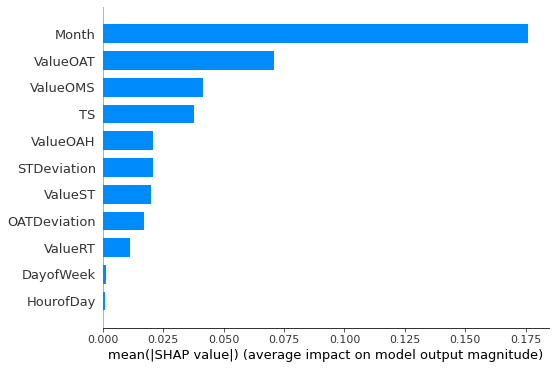

In [28]:
shap.summary_plot(shap_values[:,:,0], feature_names=X.columns, plot_type='bar')

In [29]:
def histplt(df):
    fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharey=True)
    fig.suptitle('Distribution of Features for the Anomalous Subset (K Means Clustering)')
    plt.subplots_adjust(hspace = 0.8)
    
    sns.histplot(ax=axes[0,0], data=df, x='DayofWeek',bins=30,kde=True)
    axes[0,0].set_title('Day of the week')

    sns.histplot(ax=axes[0,1],data=df, x='HourofDay', bins=30,kde=True)
    axes[0,1].set_title('Hour of the Day')

    sns.histplot(ax=axes[1,0],data=df,x='Month', bins=30, kde=True)
    axes[1,0].set_title('Month')

    sns.histplot(ax=axes[1,1],data=df,x='ValueOAT', bins=30, kde=True)
    axes[1,1].set_title('Outside air temperature')

    sns.histplot(ax=axes[2,0],data=df,x='ValueRT', bins=30, kde=True)
    axes[2,0].set_title('Room temperature')

    sns.histplot(ax=axes[2,1],data=df,x='ValueST', bins=30, kde=True)
    axes[2,1].set_title('Set point temperature')
    
    sns.histplot(ax=axes[3,0],data=df,x='ValueOAH', bins=30, kde=True)
    axes[3,0].set_title('Outside Air Humidity')

In [ ]:
histplt(noise_3c)

### 4 clusters

In [30]:
#define the model 
model = KMeans(n_clusters=4, algorithm='full',random_state=42)
# fit the model
model.fit(X1)
model.inertia_
# assign a cluster to each example
fitted_kmeans = model.predict(X1)
print(fitted_kmeans)
print(metrics.silhouette_score(X1,fitted_kmeans))
# retrieve unique clusters
clusters = unique(fitted_kmeans)
print(clusters)
# create scatter plot for samples from each cluster
#print(fitted_kmeans.unique())


[3 3 3 ... 0 0 0]
0.2631851204870436


TypeError: 'numpy.ndarray' object is not callable

In [31]:
unique, counts = np.unique(fitted_kmeans, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 6352]
 [   1 2333]
 [   2 5161]
 [   3 3108]]


In [32]:
df_analysed['4c']=fitted_kmeans


In [33]:
noise_4c=df_analysed[df_analysed['4c']==0]
normal_4c=df_analysed[df_analysed['4c']!=0]

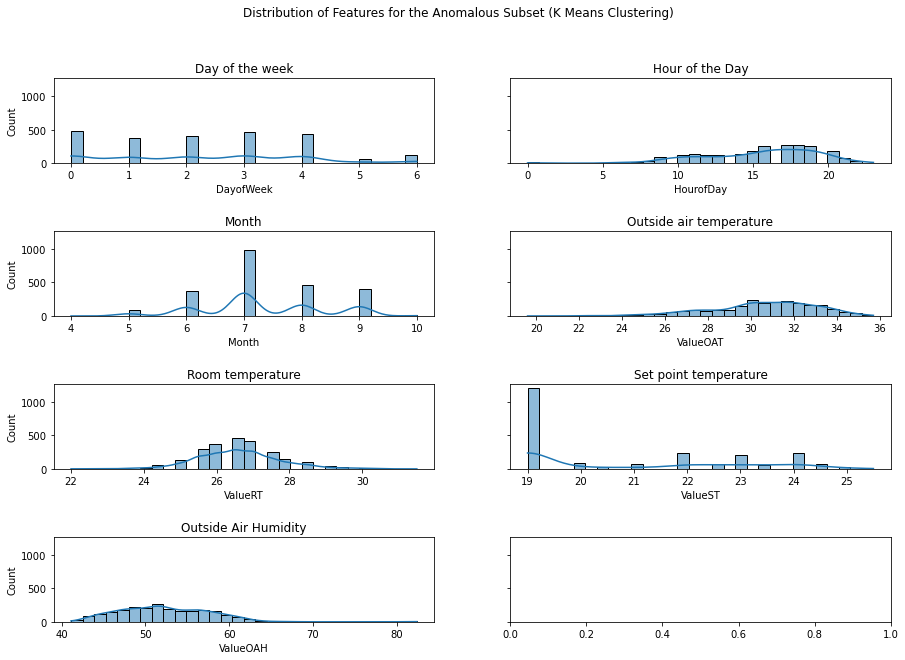

In [34]:
histplt(df_analysed[df_analysed['4c']==1])

### 5 Clusters

In [35]:
#define the model 
model = KMeans(n_clusters=5, algorithm='full',random_state=42)
# fit the model
model.fit(X1)
model.inertia_
# assign a cluster to each example
fitted_kmeans = model.predict(X1)
print(fitted_kmeans)
print(metrics.silhouette_score(X1,fitted_kmeans))
# retrieve unique clusters
clusters = unique(fitted_kmeans)
print(clusters)
# create scatter plot for samples from each cluster
#print(fitted_kmeans.unique())

[4 4 4 ... 1 1 1]
0.24526678293630771


TypeError: 'numpy.ndarray' object is not callable

In [36]:
unique, counts = np.unique(fitted_kmeans, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2340]
 [   1 4442]
 [   2 2017]
 [   3 5134]
 [   4 3021]]


In [39]:
df_analysed['5c']=fitted_kmeans

In [ ]:
#noise_4c=df_analysed[df_analysed['5c']==0]
#normal_4c=df_analysed[df_analysed['5c']!=0]

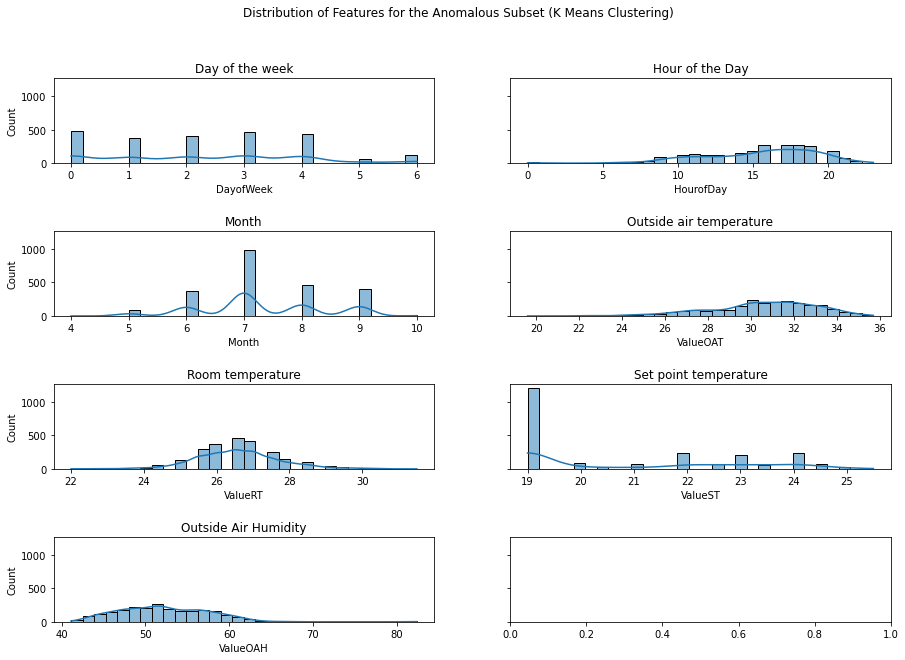

In [40]:
histplt(df_analysed[df_analysed['5c']==0])

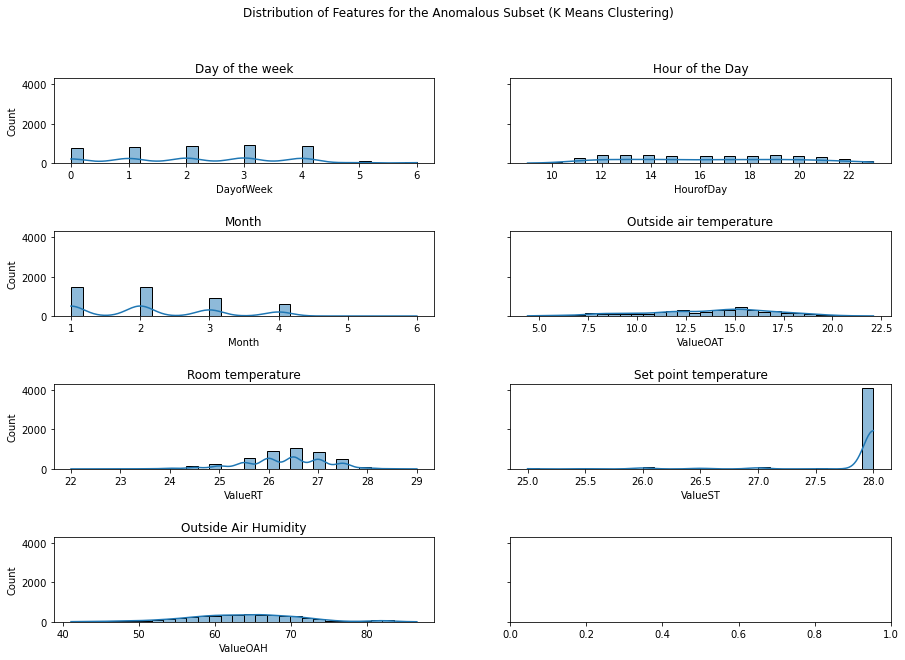

In [41]:
histplt(df_analysed[df_analysed['5c']==1])

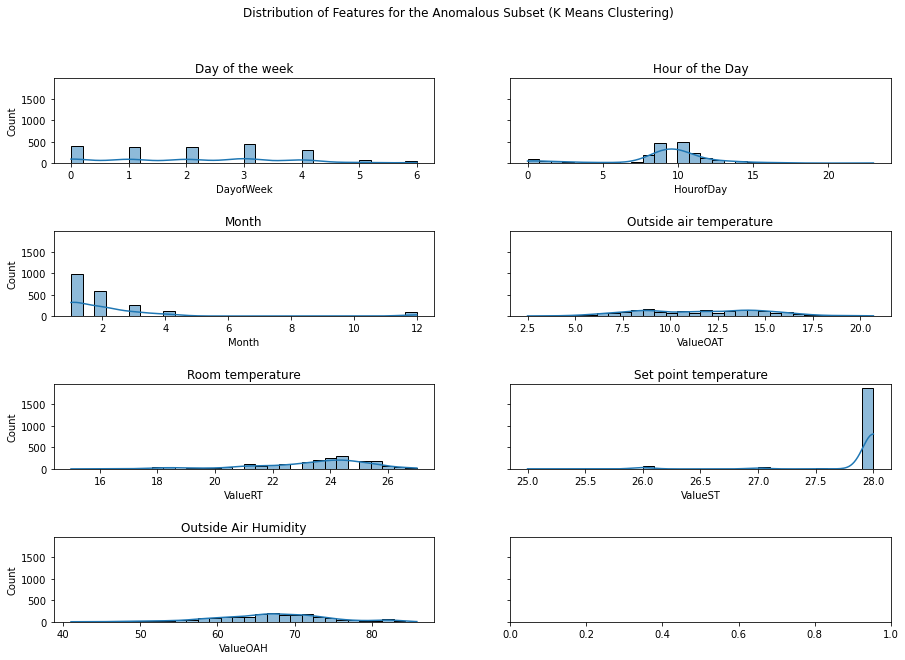

In [42]:
histplt(df_analysed[df_analysed['5c']==2])

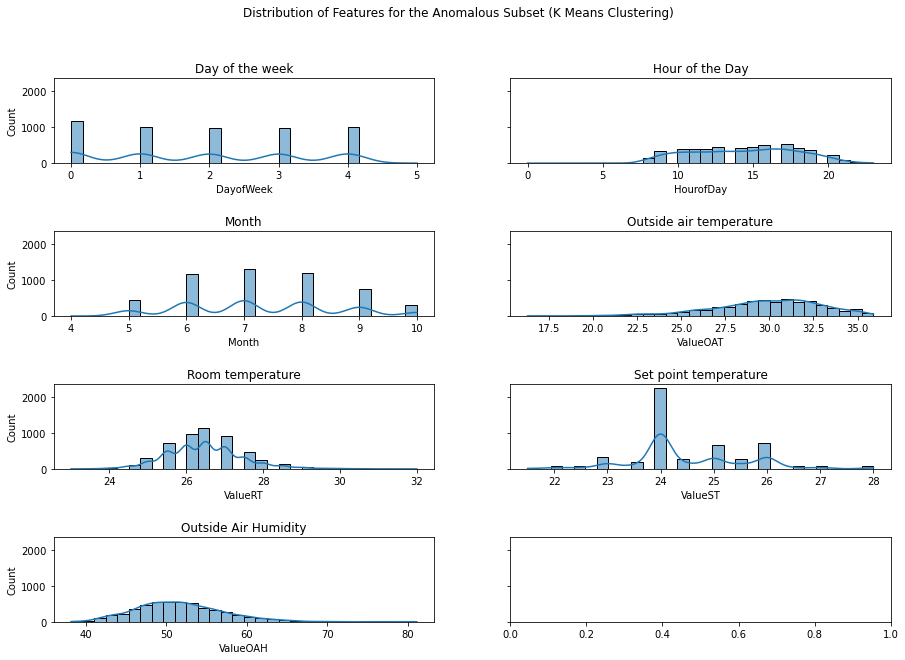

In [43]:
histplt(df_analysed[df_analysed['5c']==3])

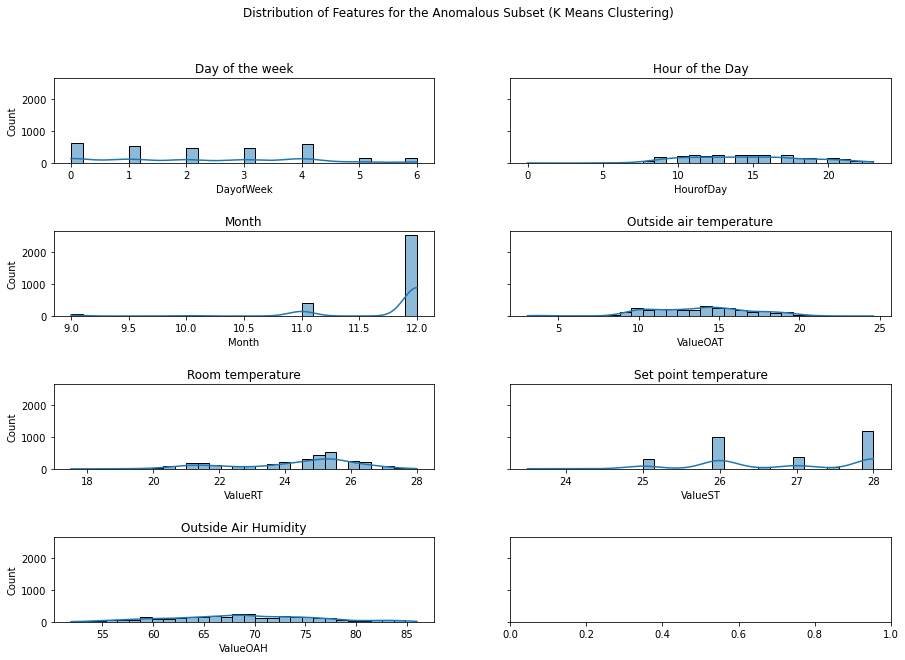

In [44]:
histplt(df_analysed[df_analysed['5c']==4])